In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./datasets/cleaned/evaluation_fire_coordinates_date_feat_eng_2.csv", na_values="", 
                                         dtype={"ID_UEV": str}, )
df.dtypes

ID_UEV                             object
MUNICIPALITE                        int64
ETAGE_HORS_SOL                    float64
NOMBRE_LOGEMENT                   float64
CODE_UTILISATION                    int64
LIBELLE_UTILISATION                object
CATEGORIE_UEF                      object
SUPERFICIE_TERRAIN                  int64
SUPERFICIE_BATIMENT               float64
NO_ARROND_ILE_CUM                  object
AGE_BATIMENT                      float64
RATIO_SURFACE                     float64
DENSITE_LOGEMENT                  float64
HAS_MULTIPLE_LOGEMENTS              int64
FIRE_FREQUENCY_ZONE               float64
fire_date                          object
NOMBRE_UNITES                     float64
fire                                 bool
LONGITUDE                         float64
LATITUDE                          float64
fire_month                        float64
fire_year                         float64
fire_season                        object
year_month                        

## Number of houses close to an incident

In [2]:
def count_fire_stats(df):
    total = len(df)
    with_fire = df['had_fire'].astype(bool).sum()
    without_fire = total - with_fire

    return {
        "total_houses": total,
        "houses_with_fire": with_fire,
        "houses_without_fire": without_fire
    }



In [3]:
# Usage
stats = count_fire_stats(df)

print(f"Houses with incident: {stats['houses_with_fire']}")
print(f"Houses without incident: {stats['houses_without_fire']}")
print(f"Houses total: {stats['total_houses']}")


Houses with incident: 294767
Houses without incident: 369016
Houses total: 663783


In [4]:
df.head()

,ID_UEV,MUNICIPALITE,ETAGE_HORS_SOL,NOMBRE_LOGEMENT,CODE_UTILISATION,LIBELLE_UTILISATION,CATEGORIE_UEF,SUPERFICIE_TERRAIN,SUPERFICIE_BATIMENT,NO_ARROND_ILE_CUM,...,fire_year,fire_season,year_month,FIRE_COUNT_LAST_YEAR_ZONE,BUILDING_COUNT,FIRE_RATE_ZONE,FIRE_COUNT_LAST_YEAR_ZONE_NORM,FIRE_RATE_ZONE_NORM,had_fire,missing_coords
0,1038405,50,1.0,1.0,1921,Stationnement intérieur (condo),Condominium,2,16.0,REM19,...,NaN,NaN,NaT,9307,85689,0.108614,1.000000,0.846896,0,False
1,5213144,50,1.0,1.0,1000,Logement,Condominium,69,68.0,REM31,...,NaN,NaN,NaT,701,22003,0.031859,0.057806,0.143310,0,True
2,1036349,50,3.0,1.0,1000,Logement,Condominium,133,127.0,REM19,...,NaN,NaN,NaT,9307,85689,0.108614,1.000000,0.846896,0,True
3,5189527,50,1.0,1.0,1000,Logement,Condominium,16,62.0,REM19,...,NaN,NaN,NaT,9307,85689,0.108614,1.000000,0.846896,0,True
4,1037334,50,1.0,1.0,1000,Logement,Condominium,16,82.0,REM19,...,2023.0,Winter,2023-01,9307,85689,0.108614,1.000000,0.846896,1,False


## Normalization and feature engineering (density = log_batiment/log_terrain)

In [5]:
def create_log_features_and_density(df):
    df["log_terrain"] = np.log1p(df["SUPERFICIE_TERRAIN"])
    df["log_batiment"] = np.log1p(df["SUPERFICIE_BATIMENT"])
    df["log_etage_hors_sol"] = np.log1p(df["ETAGE_HORS_SOL"])
    df["log_numbre_de_logement"] = np.log1p(df["NOMBRE_LOGEMENT"])
    df["density"] = df["log_batiment"] / df["log_terrain"]
    df["fire_month"] = df["fire_month"].fillna(13).astype(int)

create_log_features_and_density(df)

## Normalized AGE_BATIMENT

In [6]:
unique_values = df["fire_month"].unique()
print(unique_values)


[13  1  6  9  5 12 11  8 10  4  7  3  2]


## Data Overview and Exploration

### Observations: 

In [7]:
df.shape[0]



663783

### Features (columns): 

In [8]:
df.shape[1]



36

### Data types
Target variable: fire (binary: True if property had an incident, else False)

In [9]:
df.dtypes


ID_UEV                             object
MUNICIPALITE                        int64
ETAGE_HORS_SOL                    float64
NOMBRE_LOGEMENT                   float64
CODE_UTILISATION                    int64
LIBELLE_UTILISATION                object
CATEGORIE_UEF                      object
SUPERFICIE_TERRAIN                  int64
SUPERFICIE_BATIMENT               float64
NO_ARROND_ILE_CUM                  object
AGE_BATIMENT                      float64
RATIO_SURFACE                     float64
DENSITE_LOGEMENT                  float64
HAS_MULTIPLE_LOGEMENTS              int64
FIRE_FREQUENCY_ZONE               float64
fire_date                          object
NOMBRE_UNITES                     float64
fire                                 bool
LONGITUDE                         float64
LATITUDE                          float64
fire_month                          int64
fire_year                         float64
fire_season                        object
year_month                        

## Variable Relationships and Patterns

### • Examination of relationships between key variables using visual and statistical techniques.

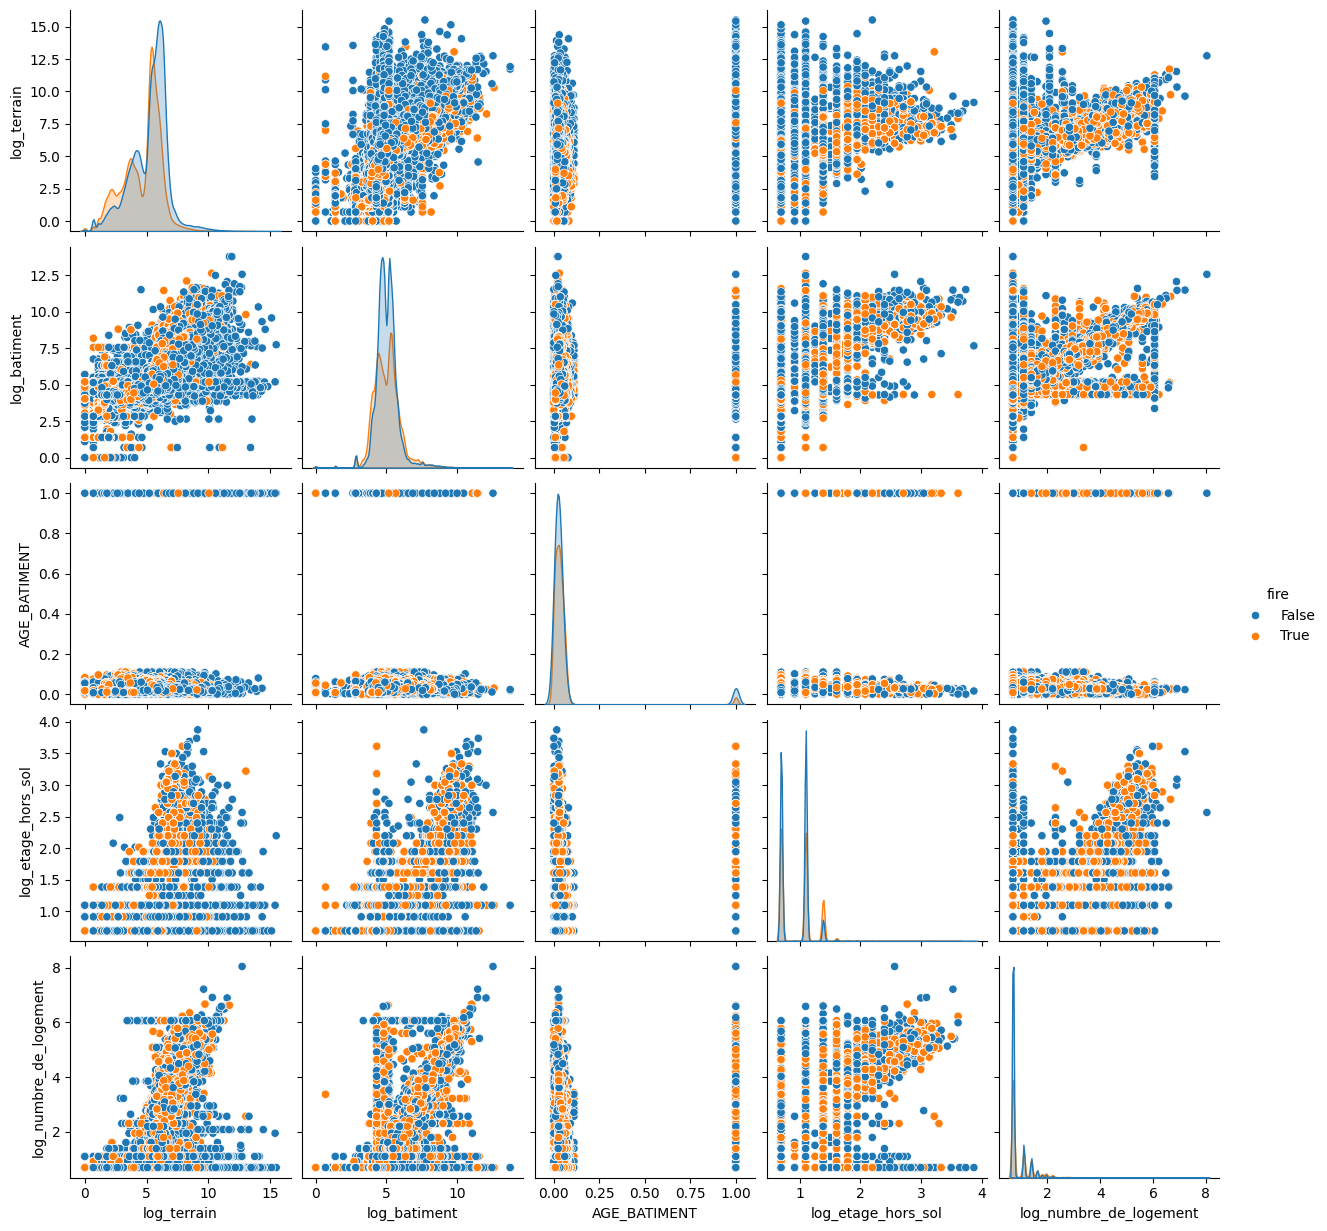

In [10]:
import seaborn as sns
import numpy as np



sns.pairplot(df, vars=[
    "log_terrain", 
    "log_batiment", 
    "AGE_BATIMENT",
    "log_etage_hors_sol",
    "log_numbre_de_logement",
    
], hue="fire")


In [11]:
print("hello world7")

hello world7


### • Identification of trends, clusters, or correlations that may inform future modeling steps.

#### Shows slight differentiation between terrain size between fire/non-fire houses

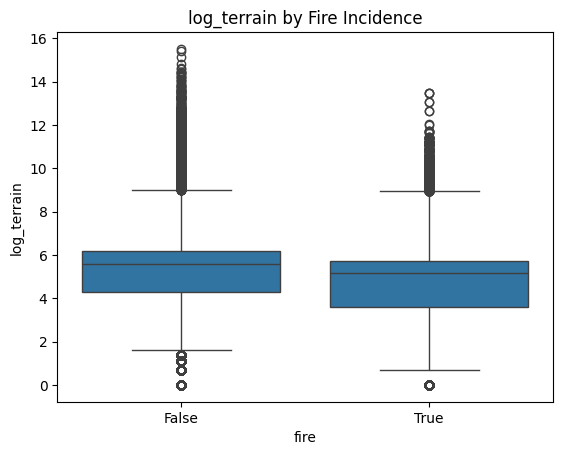

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="fire", y="log_terrain", data=df)
plt.title("log_terrain by Fire Incidence")
plt.show()


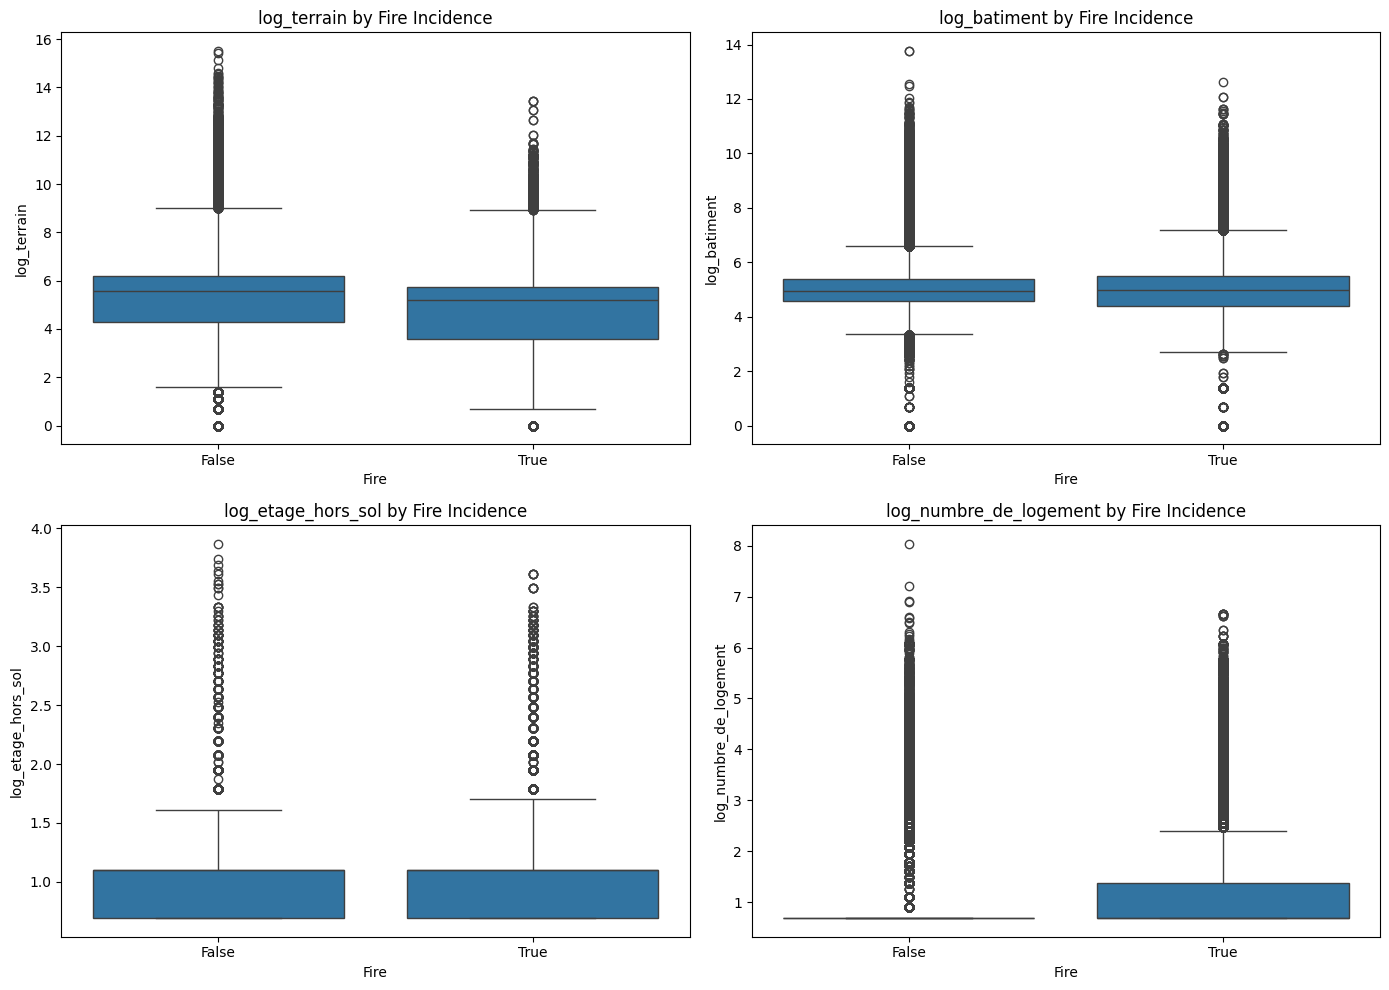

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

log_vars = ["log_terrain", "log_batiment", "log_etage_hors_sol", "log_numbre_de_logement"]

plt.figure(figsize=(14, 10))
for i, var in enumerate(log_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="fire", y=var, data=df)
    plt.title(f"{var} by Fire Incidence")
    plt.xlabel("Fire")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


## Feature engineering

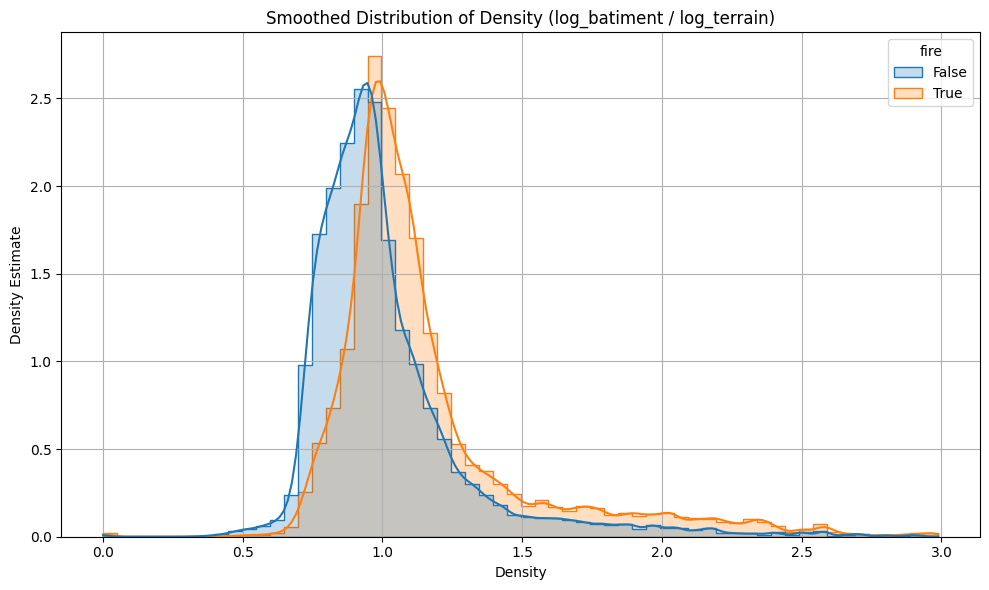

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Optional: limit extreme values to focus on main distribution
filtered_df = df[df["density"].between(0, 3)]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=filtered_df,
    x="density",
    hue="fire",
    kde=True,
    bins=60,
    stat="density",
    common_norm=False,
    element="step"  # gives cleaner outlines
)
plt.title("Smoothed Distribution of Density (log_batiment / log_terrain)")
plt.xlabel("Density")
plt.ylabel("Density Estimate")
plt.grid(True)
plt.tight_layout()
plt.show()


## Model training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

def handle_missing_values(X):
    X = X.fillna(0)
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
    return X

features = [
    "log_terrain", 
    "log_batiment", 
    "log_etage_hors_sol", 
    "log_numbre_de_logement", 
    "AGE_BATIMENT", 
    "density"
]
X = df[features]
y = df["fire"]

X = handle_missing_values(X)
print("was here")

was here


In [16]:



# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix:")
    print(cm)
    print("\nConfusion Matrix Details:")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"False Positive Rate (FPR): {FP / (FP + TN):.3f}")
    print(f"False Negative Rate (FNR): {FN / (FN + TP):.3f}")
    print(f"True Positive Rate (Recall): {TP / (TP + FN):.3f}")
    print(f"True Negative Rate (Specificity): {TN / (TN + FP):.3f}")

def print_classification_report(y_test, y_pred, y_prob):
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

print_confusion_matrix(y_test, y_pred)
print_classification_report(y_test, y_pred, y_prob)


Confusion Matrix:
[[64111  9502]
 [ 8258 50886]]

Confusion Matrix Details:
True Positives (TP): 50886
True Negatives (TN): 64111
False Positives (FP): 9502
False Negatives (FN): 8258
False Positive Rate (FPR): 0.129
False Negative Rate (FNR): 0.140
True Positive Rate (Recall): 0.860
True Negative Rate (Specificity): 0.871

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.87      0.88     73613
        True       0.84      0.86      0.85     59144

    accuracy                           0.87    132757
   macro avg       0.86      0.87      0.86    132757
weighted avg       0.87      0.87      0.87    132757

ROC AUC: 0.936


In [18]:
print("can we visualize the change in github?")

can we visualize the change in github?


## Predict month using random forest

In [19]:
y = df["fire_month"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_pred, digits=3))



              precision    recall  f1-score   support

           1      0.208     0.153     0.176      5328
           2      0.204     0.198     0.201      4670
           3      0.234     0.181     0.204      5406
           4      0.256     0.191     0.219      5881
           5      0.227     0.162     0.189      6266
           6      0.219     0.196     0.207      5071
           7      0.258     0.303     0.279      4450
           8      0.183     0.216     0.198      4384
           9      0.202     0.248     0.222      4056
          10      0.211     0.213     0.212      4575
          11      0.173     0.186     0.180      4558
          12      0.217     0.223     0.220      4499
          13      0.874     0.917     0.895     73613

    accuracy                          0.599    132757
   macro avg      0.267     0.261     0.262    132757
weighted avg      0.582     0.599     0.589    132757



In [20]:
print("was here 00")

was here 00
